# Change date

In [1]:
date = '2017-04-28'
data_dir = 'data'

In [2]:
from pathlib import Path
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from skimage.transform import rotate
import scipy.optimize as so
from collections import namedtuple

In [4]:
from heatmap import heatmap48

/home/anto/miniconda3/envs/py36/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [5]:
dir_ = Path('.')

In [6]:
save_figures = True
savefigdir_ = 'figures'

def figure(x=None, y=None, scale=1):
    if x is None:
        x = ncols
    if y is None:
        y = nrows
    return plt.subplots(figsize=(scale*x, scale*y))

def save_name(name, folder='.', nospaces=False):
    sname = '%s/%s_%s' % (folder, mlabel, name)
    if nospaces:
        sname.replace(' ', '_')
    return sname 
    
def savefig(name, nospaces=False, **kwargs):
    if not save_figures:
        return
    kwargs_ = dict(dpi=100, bbox_inches='tight')
                   #frameon=True, facecolor='white', transparent=False)
    kwargs_.update(kwargs)
    fname = save_name(name, savefigdir_, nospaces=nospaces)
    plt.savefig(fname, **kwargs_)
    print('Saved: %s.png' % fname)

In [7]:
[f for f in dir_.glob('*.png')]

[PosixPath('conf14_R_4x12_647LP_200ms.png'),
 PosixPath('conf14_R_4x12_647LP_200ms_slit.png'),
 PosixPath('conf9_G_4x12_647LP_200ms.png'),
 PosixPath('conf9_G_4x12_647LP_200ms_slit.png')]

# Change file names

In [8]:
#crop = (300, 1200)
crop = (400, 1100)

In [9]:
g = ndi.imread('conf9_G_4x12_647LP_200ms_slit.png')[:, crop[0]:crop[1]]

r = ndi.imread('conf14_R_4x12_647LP_200ms_slit.png')[:, crop[0]:crop[1]]

In [10]:
gn = ndi.imread('conf9_G_4x12_647LP_200ms.png')[:, crop[0]:crop[1]]

rn = ndi.imread('conf14_R_4x12_647LP_200ms.png')[:, crop[0]:crop[1]]

In [11]:
mlabel = '2017-04-28_conf9_G_conf14_R'

# Change rotation

In [12]:
rotation = -0.8

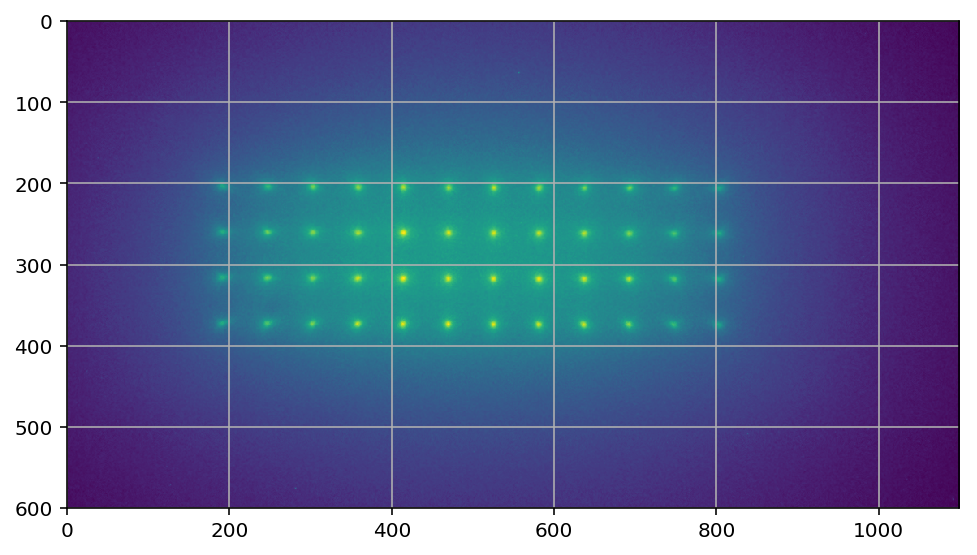

In [13]:
gr = rotate(g.T, rotation, preserve_range=True)[50:-50,50:-50]
gr -= gr.min()
plt.figure(figsize=(8, 6))
plt.imshow(gr)
plt.grid()

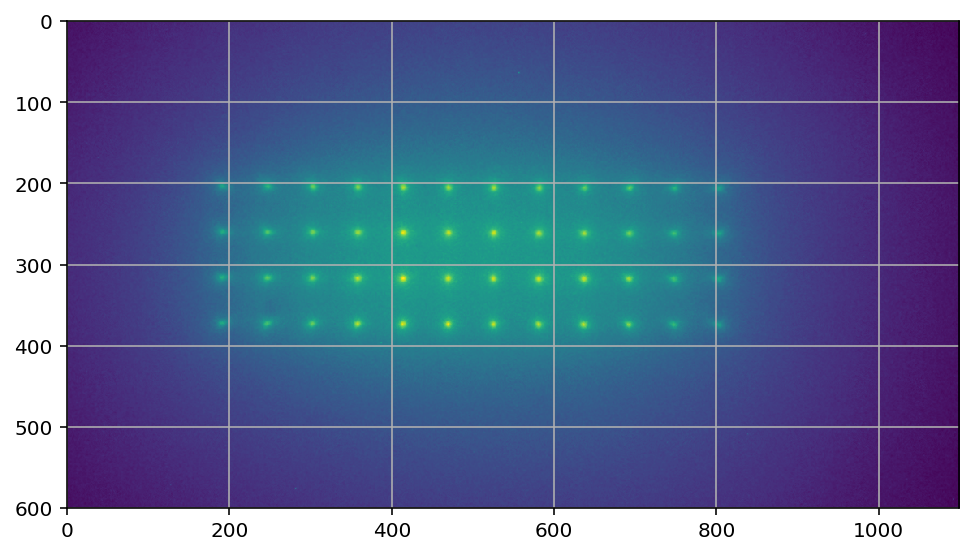

In [14]:
gnr = rotate(gn.T, rotation, preserve_range=True)[50:-50,50:-50]
gnr -= gr.min()
plt.figure(figsize=(8, 6))
plt.imshow(gnr)
plt.grid()

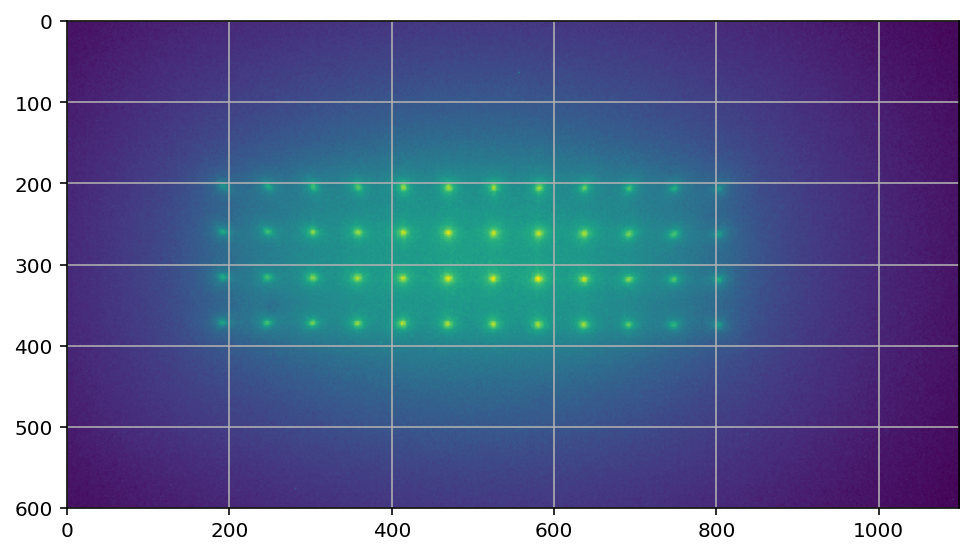

In [15]:
rr = rotate(r.T, rotation, preserve_range=True)[50:-50,50:-50]
rr -= rr.min()
plt.figure(figsize=(8, 6))
plt.imshow(rr)
plt.grid()

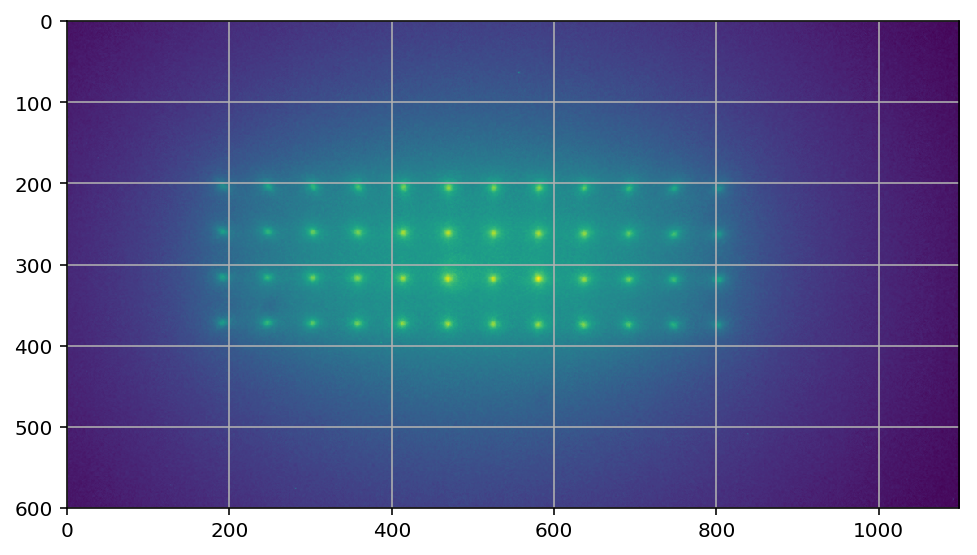

In [16]:
rnr = rotate(rn.T, rotation, preserve_range=True)[50:-50,50:-50]
rnr -= rnr.min()
plt.figure(figsize=(8, 6))
plt.imshow(rnr)
plt.grid()

In [17]:
rrlp = ndi.gaussian_filter(rr, 40)
rrhp = rr - rrlp

In [18]:
grlp = ndi.gaussian_filter(gr, 40)
grhp = gr - grlp

In [19]:
rnrlp = ndi.gaussian_filter(rnr, 40)
rnrhp = rnr - rnrlp

In [20]:
gnrlp = ndi.gaussian_filter(gnr, 40)
gnrhp = gnr - gnrlp

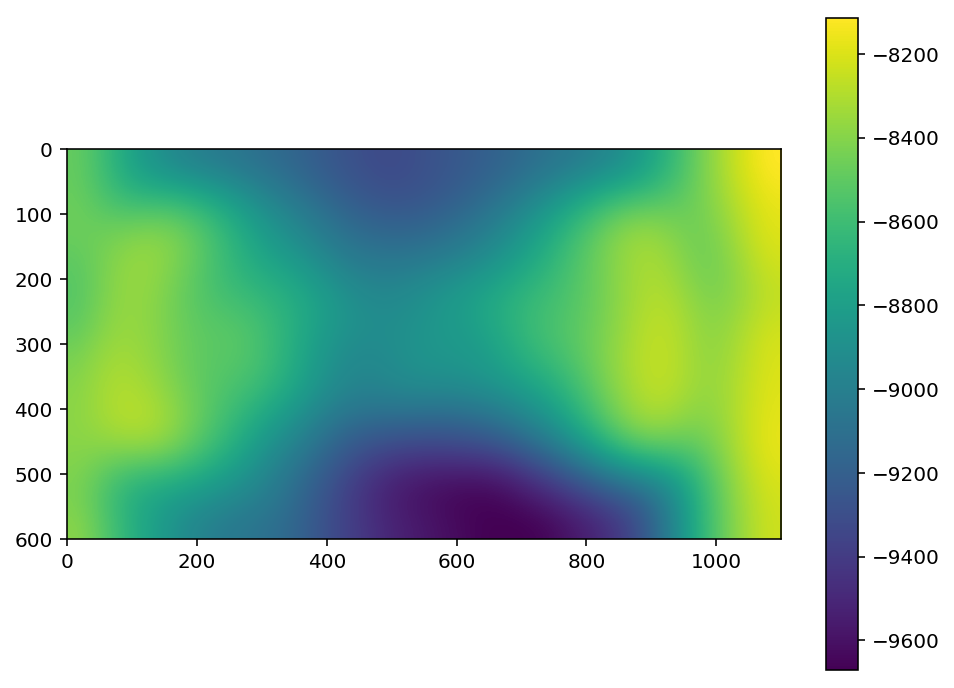

In [21]:
plt.figure(figsize=(8, 6))
plt.imshow(grlp-gnrlp);
plt.colorbar()

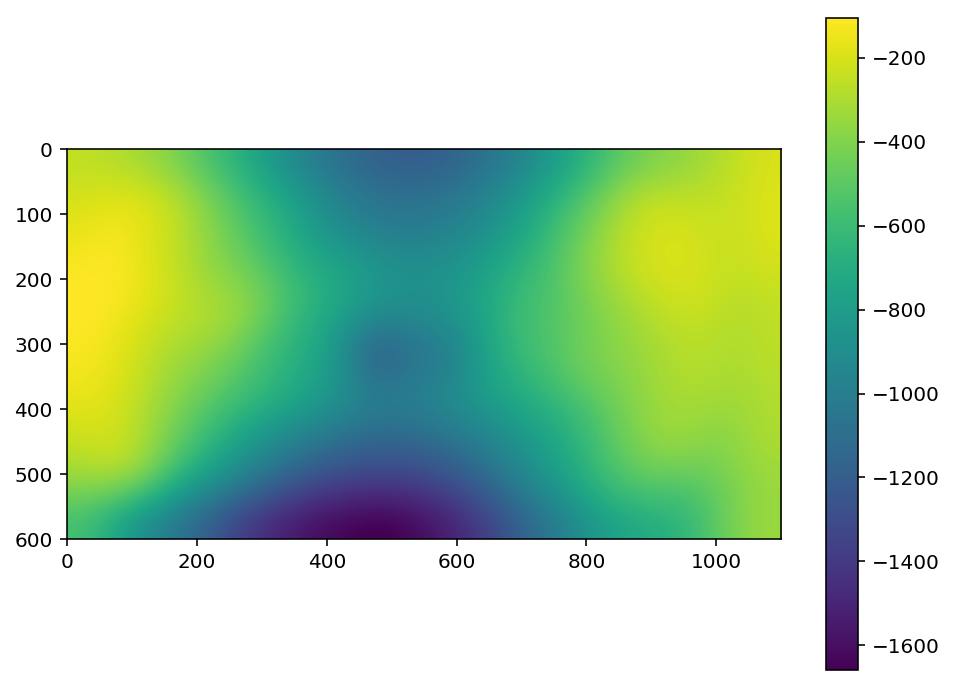

In [22]:
plt.figure(figsize=(8, 6))
plt.imshow(rrlp-rnrlp);
plt.colorbar()

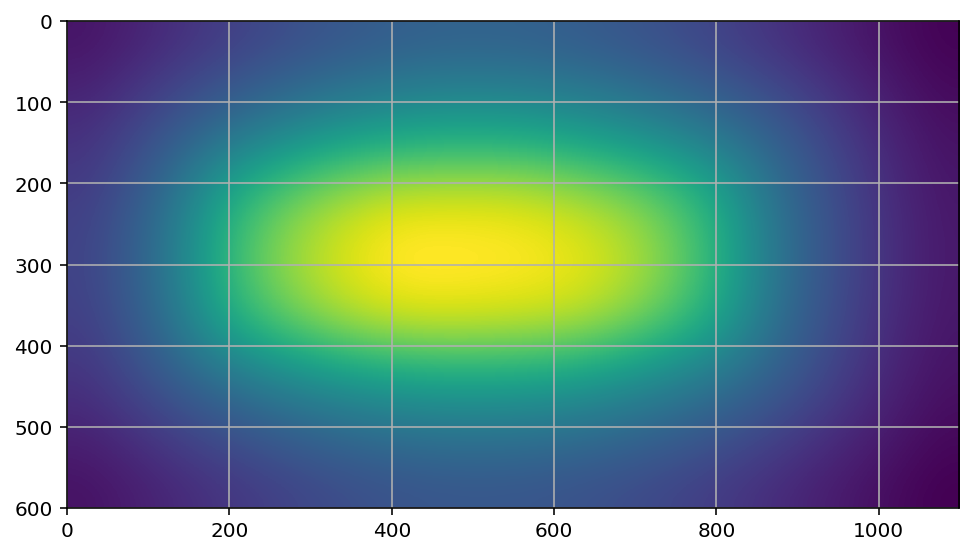

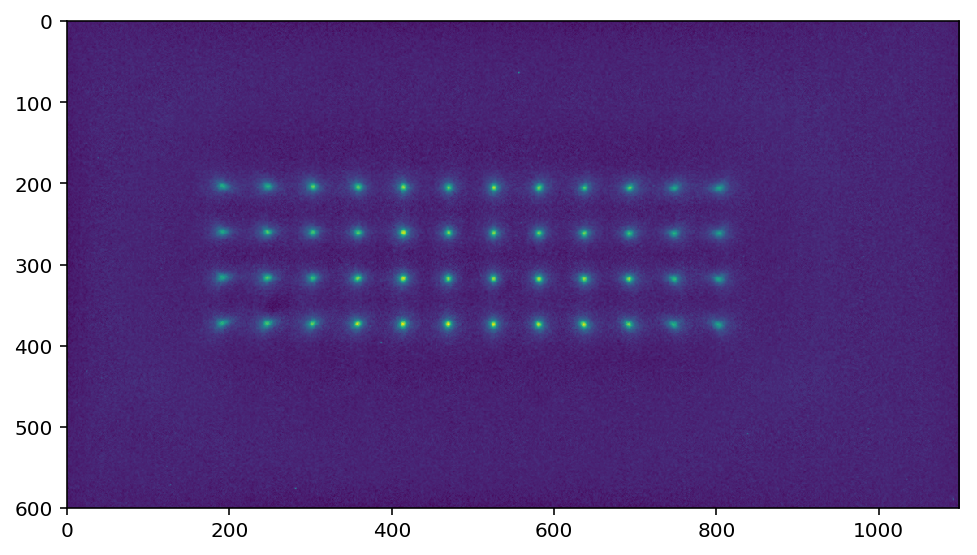

In [23]:
plt.figure(figsize=(8, 6))
plt.imshow(grlp)
plt.grid()
plt.figure(figsize=(8, 6))
plt.imshow(grhp);

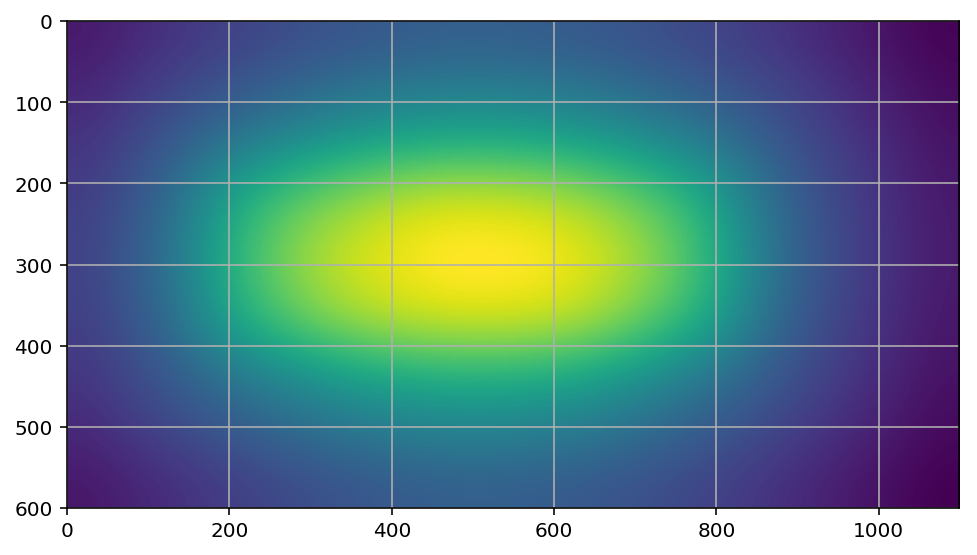

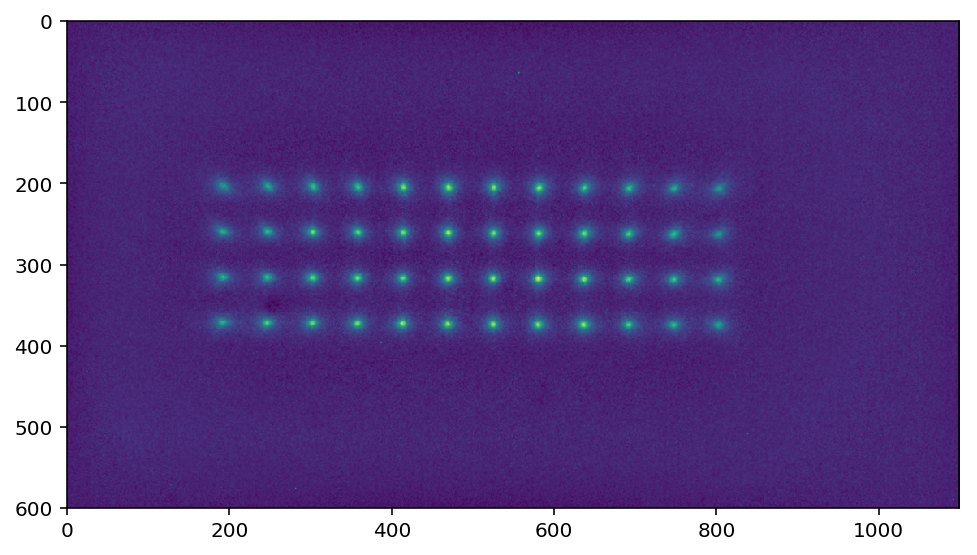

In [24]:
plt.figure(figsize=(8, 6))
plt.imshow(rrlp)
plt.grid()
plt.figure(figsize=(8, 6))
plt.imshow(rrhp);